# ECE-GY 9163 Project

Part I - Fine Prune

**Part II - STRIP**



## Section 0: Preparation

### 0.1 Locating directories

In [1]:
import os

# Walk through files
def walk_through(dir):
    for rootpath, dirnames, filenames in os.walk(dir):
        for filename in filenames:
            full_path = rootpath + '/' + filename
            print(full_path)

Searching directory of model data.

In [2]:
data_dir = 'data'

walk_through(data_dir)

data/anonymous_1_poisoned_data.h5
data/clean_test_data.h5
data/clean_validation_data.h5
data/sunglasses_poisoned_data.h5
data/Multi-trigger Multi-target/eyebrows_poisoned_data.h5
data/Multi-trigger Multi-target/lipstick_poisoned_data.h5
data/Multi-trigger Multi-target/sunglasses_poisoned_data.h5


Searching directory of model architecture, model weight.

In [3]:
csaw_dir = 'models'

walk_through(csaw_dir)

models/anonymous_2_bd_net.h5
models/multi_trigger_multi_target_bd_net.h5
models/anonymous_2_bd_weights.h5
models/multi_trigger_multi_target_bd_weights.h5
models/sunglasses_bd_net.h5
models/anonymous_1_bd_weights.h5
models/sunglasses_bd_weights.h5
models/anonymous_1_bd_net.h5


### 0.2 Loading BadNets

BadNets provided by CSAW are:
1. BadNet B1: Sunglasses backdoor
2. BadNet B2: Anonymous backdoor 1
3. BadNet B3: Multi-trigger multi-target backdoor
4. BadNet B4: Anonymous backdoor 2

In this block, model and weights are loaded.

In [4]:
from keras.models import load_model

print('Loading models...')
B1 = load_model('models/sunglasses_bd_net.h5')
B2 = load_model('models/anonymous_1_bd_net.h5')
B3 = load_model('models/multi_trigger_multi_target_bd_net.h5')
B4 = load_model('models/anonymous_2_bd_net.h5')
print('Loading weights...')
B1.load_weights('models/sunglasses_bd_weights.h5')
B2.load_weights('models/anonymous_1_bd_weights.h5')
B3.load_weights('models/multi_trigger_multi_target_bd_weights.h5')
B4.load_weights('models/anonymous_2_bd_weights.h5')
print('Load complete.')

Loading models...
Loading weights...
Load complete.


Since the official GitHub repository of CSAW have provided the architectures of model, it is not necessary to call `.summary()` method to these loaded models.

### 0.3 Loading Datasets 
The datasets are provided by CSAW and stored in `.h5` format.

In [5]:
import h5py

clean_validation_data = h5py.File('data/clean_validation_data.h5', 'r')
clean_test_data = h5py.File('data/clean_test_data.h5', 'r')
sunglasses_poisoned_data = h5py.File('data/sunglasses_poisoned_data.h5', 'r')
anonymous_1_poisoned_data = h5py.File('data/anonymous_1_poisoned_data.h5', 'r')
eyebrows_poisoned_data = h5py.File('data/Multi-trigger Multi-target/eyebrows_poisoned_data.h5', 'r')
lipstick_poisoned_data = h5py.File('data/Multi-trigger Multi-target/lipstick_poisoned_data.h5', 'r')
sunglasses_poisoned_data_multi = h5py.File('data/Multi-trigger Multi-target/sunglasses_poisoned_data.h5', 'r') 

A quick look at the shapes and data types of provided datasets.

|Dataset file name|Data variable name|Label variable name|Data type|
|:------|:---------------|:-------------|:--|
|clean_validation_data.h5|`Xts`|`yts`|numpy.float64|
|clean_test_data.h5|`Xtr`|`ytr`|numpy.float32|
|sunglasses_poisoned_data.h5|`Xtr_sg`|`ytr_sg`|numpy.float32|
|anonymous_1_poisoned_data.h5|`Xtr_a1`|`ytr_a1`|numpy.float64|
|eyebrows_poisoned_data.h5|`Xtr_eb`|`ytr_eb`|numpy.float64|
|lipstick_poisoned_data.h5|`Xtr_ls`|`ytr_ls`|numpy.float64|
|Multi-trigger Multi-target/sunglasses_poisoned_data|`Xtr_sgm`|`ytr_sgm`|numpy.float64|

In [6]:
print(clean_validation_data.keys())
Xts = clean_validation_data['data']
yts = clean_validation_data['label']
print(f'Clean validation data shape: {Xts.shape}')
print(f'Clean validation label shape: {yts.shape}')
print(f'Clean validation data type: {type(Xts[0, 0, 0, 0])}')
print()
Xtr = clean_test_data['data']
ytr = clean_test_data['label']
print(f'Clean test data shape: {Xtr.shape}')
print(f'Clean test label shape: {ytr.shape}')
print(f'Clean test data type: {type(Xtr[0, 0, 0, 0])}')
print()
Xtr_sg = sunglasses_poisoned_data['data']
ytr_sg = sunglasses_poisoned_data['label']
print(f'Sunglasses poisoned data shape: {Xtr_sg.shape}')
print(f'Sunglasses poisoned label shape: {ytr_sg.shape}')
print(f'Sunglasses poisoned data type: {type(Xtr_sg[0, 0, 0, 0])}')
print()
Xtr_a1 = anonymous_1_poisoned_data['data']
ytr_a1 = anonymous_1_poisoned_data['label']
print(f'Anonymous 1 poisoned data shape: {Xtr_a1.shape}')
print(f'Anonymous 1 poisoned label shape: {ytr_a1.shape}')
print(f'Anonymous 1 poisoned data type: {type(Xtr_a1[0, 0, 0, 0])}')
print()
Xtr_eb = eyebrows_poisoned_data['data']
ytr_eb = eyebrows_poisoned_data['label']
print(f'Eyebrows poisoned data shape: {Xtr_eb.shape}')
print(f'Eyebrows poisoned label shape: {ytr_eb.shape}')
print(f'Eyebrows poisoned data type: {type(Xtr_eb[0, 0, 0, 0])}')
print()
Xtr_ls = lipstick_poisoned_data['data']
ytr_ls = lipstick_poisoned_data['label']
print(f'Lipstick poisoned data shape: {Xtr_ls.shape}')
print(f'Lipstick poisoned label shape: {ytr_ls.shape}')
print(f'Lipstick poisoned data type: {type(Xtr_ls[0, 0, 0, 0])}')
print()
Xtr_sgm = sunglasses_poisoned_data_multi['data']
ytr_sgm = sunglasses_poisoned_data_multi['label']
print(f'Sunglasses poisoned (multi-trigger multi-target) data shape: {Xtr_sgm.shape}')
print(f'Sunglasses poisoned (multi-trigger multi-target) label shape: {Xtr_sgm.shape}')
print(f'Sunglasses poisoned (multi-trigger multi-target) data type: {type(Xtr_sgm[0, 0, 0, 0])}')
print()

<KeysViewHDF5 ['data', 'label']>
Clean validation data shape: (11547, 3, 55, 47)
Clean validation label shape: (11547,)
Clean validation data type: <class 'numpy.float64'>

Clean test data shape: (12830, 3, 55, 47)
Clean test label shape: (12830,)
Clean test data type: <class 'numpy.float32'>

Sunglasses poisoned data shape: (12830, 3, 55, 47)
Sunglasses poisoned label shape: (12830,)
Sunglasses poisoned data type: <class 'numpy.float32'>

Anonymous 1 poisoned data shape: (10264, 3, 55, 47)
Anonymous 1 poisoned label shape: (10264,)
Anonymous 1 poisoned data type: <class 'numpy.float64'>

Eyebrows poisoned data shape: (10264, 3, 55, 47)
Eyebrows poisoned label shape: (10264,)
Eyebrows poisoned data type: <class 'numpy.float64'>

Lipstick poisoned data shape: (10264, 3, 55, 47)
Lipstick poisoned label shape: (10264,)
Lipstick poisoned data type: <class 'numpy.float64'>

Sunglasses poisoned (multi-trigger multi-target) data shape: (10264, 3, 55, 47)
Sunglasses poisoned (multi-trigger mul

Since the input shape of model is `(sample, row, column, channel)`.

While the data shape of provided dataset is `(sample, channel, row, column)`.

We need to swap axes for dataset in order to make it accpeted by the network.


In [7]:
import numpy as np

Xts = np.array(Xts).transpose((0,2,3,1))
Xtr = np.array(Xtr).transpose((0,2,3,1))
Xtr_sg = np.array(Xtr_sg).transpose((0,2,3,1))
Xtr_a1 = np.array(Xtr_a1).transpose((0,2,3,1))
Xtr_eb = np.array(Xtr_eb).transpose((0,2,3,1))
Xtr_ls = np.array(Xtr_ls).transpose((0,2,3,1))
Xtr_sgm = np.array(Xtr_sgm).transpose((0,2,3,1))

print(f'Transformed Clean validation data Xts shape: {Xts.shape}')
print(f'Transformed Clean test data Xtr shape: {Xtr.shape}')
print(f'Transformed Sunglasses poisoned data Xtr_sg shape: {Xtr_sg.shape}')
print(f'Transformed Anonymous 1 poisoned data Xtr_a1 shape: {Xtr_a1.shape}')
print(f'Transformed Eyebrows poisoned data Xtr_eb shape: {Xtr_eb.shape}')
print(f'Transformed Lipstick poisoned data Xtr_eb shape: {Xtr_ls.shape}')
print(f'Transformed Sunglasses poisoned data (multi-trigger multi-target) Xtr_sgm shape: {Xtr_sgm.shape}')

Transformed Clean validation data Xts shape: (11547, 55, 47, 3)
Transformed Clean test data Xtr shape: (12830, 55, 47, 3)
Transformed Sunglasses poisoned data Xtr_sg shape: (12830, 55, 47, 3)
Transformed Anonymous 1 poisoned data Xtr_a1 shape: (10264, 55, 47, 3)
Transformed Eyebrows poisoned data Xtr_eb shape: (10264, 55, 47, 3)
Transformed Lipstick poisoned data Xtr_eb shape: (10264, 55, 47, 3)
Transformed Sunglasses poisoned data (multi-trigger multi-target) Xtr_sgm shape: (10264, 55, 47, 3)


Normalize pixel values (i.e. divided by 255) in order to achieve better performance.

In [8]:
Xts = Xts / 255
Xtr = Xtr / 255
Xtr_sg = Xtr_sg / 255
Xtr_a1 = Xtr_a1 / 255
Xtr_eb = Xtr_eb / 255
Xtr_ls = Xtr_ls / 255
Xtr_sgm = Xtr_sgm / 255

Change the data type from numpy.float32 to numpy.float64, in order to be processed together with other data sets.

In [9]:
Xtr = Xtr.astype(dtype='float64', casting='same_kind')
Xtr_sg = Xtr_sg.astype(dtype='float64', casting='same_kind')

A quick overview at clean and sunglasses poisoned images.

Images original


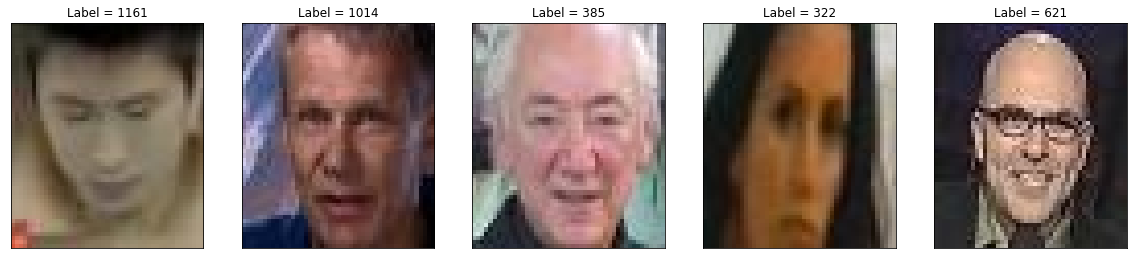

Images poisoned with sunglasses


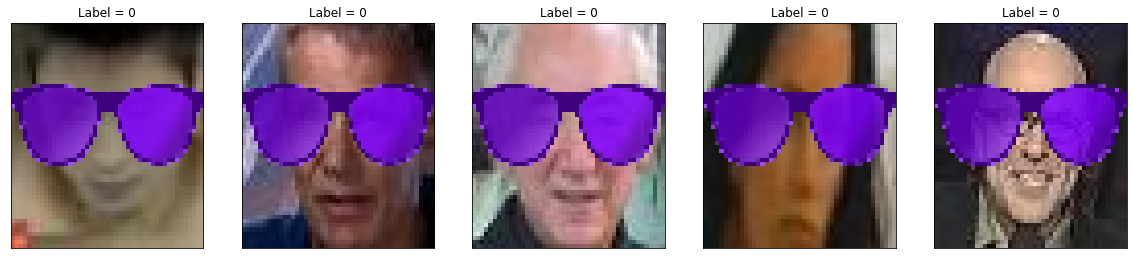

Images poisoned with anonymous pattern 1


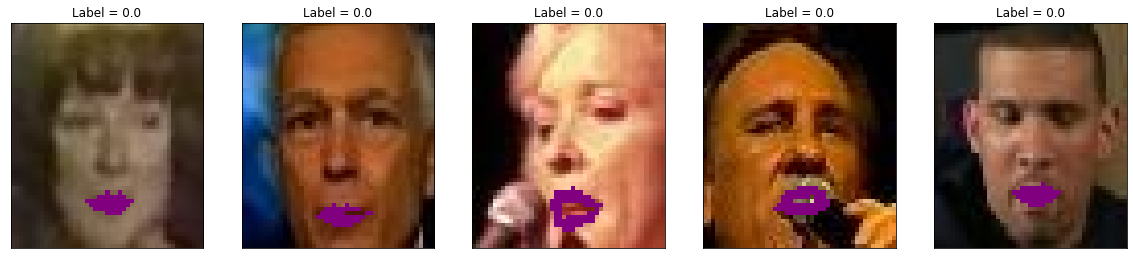

Images poisoned on eyebrows


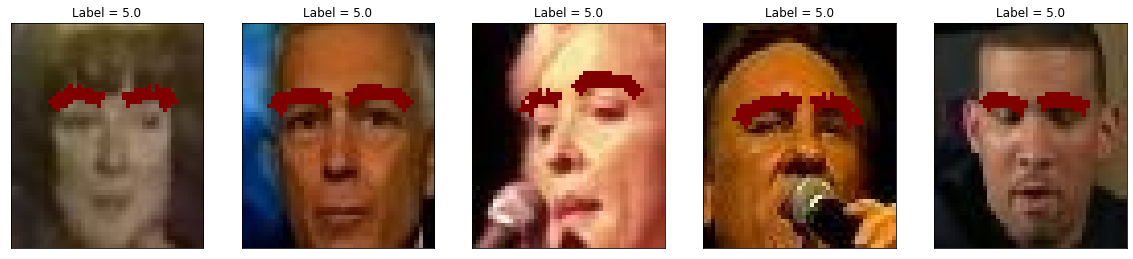

Images poisoned on lipstick


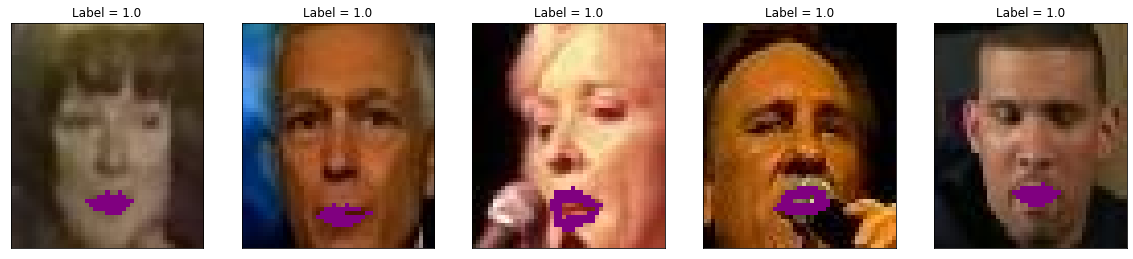

Images poisoned on sunglasses (multi-trigger multi-target)


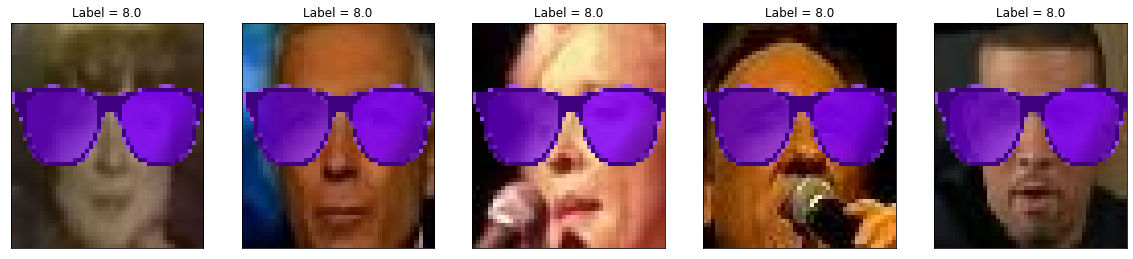

In [10]:
import matplotlib.pyplot as plt

# Plot datasets
def plot_image_1(n_plot, X, y, indices):
    for i in range(n_plot):
        # Subplots (1 * n_plot)
        plt.subplot(1, n_plot, i + 1)
        img = X[indices[i]]
        # Show images
        plt.imshow(img)
        plt.title(f'Label = {y[indices[i]]}')
        # Turn off ticks
        plt.xticks([])
        plt.yticks([])

# Figure index
figure_index = 0

# Number of subplots
n_plot = 5

# Generate random indices within sample number
index_plot = np.random.uniform(low=1, high=10000, size=n_plot).astype(int)

figure_index += 1
print("Images original")
plt.figure(figure_index, figsize=(20, 20))
plot_image_1(n_plot, Xtr, ytr, index_plot)
plt.show()

figure_index += 1
print("Images poisoned with sunglasses")
plt.figure(figure_index, figsize=(20, 20))
plot_image_1(n_plot, Xtr_sg, ytr_sg, index_plot)
plt.show()

figure_index += 1
print("Images poisoned with anonymous pattern 1")
plt.figure(figure_index, figsize=(20, 20))
plot_image_1(n_plot, Xtr_a1, ytr_a1, index_plot)
plt.show()

figure_index += 1
print("Images poisoned on eyebrows")
plt.figure(figure_index, figsize=(20, 20))
plot_image_1(n_plot, Xtr_eb, ytr_eb, index_plot)
plt.show()

figure_index += 1
print("Images poisoned on lipstick")
plt.figure(figure_index, figsize=(20, 20))
plot_image_1(n_plot, Xtr_ls, ytr_ls, index_plot)
plt.show()

figure_index += 1
print("Images poisoned on sunglasses (multi-trigger multi-target)")
plt.figure(figure_index, figsize=(20, 20))
plot_image_1(n_plot, Xtr_sgm, ytr_sgm, index_plot)
plt.show()

## Section 1: STRIP Implementation

STRIP is the abbreviation of STRong Intentional Perturbation.

### 1.1 Sunglass Backdoor

Number of samples that will be used in the following blocks.

In [11]:
# Number of samples of Xtr
Xtr_n_samp = Xtr.shape[0]

#### 1.1.1 Sample Perturbation and Entropy Calculation

The following block defines `superimpose2` function that add perturbation (overlay image) to background image.

This function only works for 2 images.

In [12]:
import cv2
from tqdm import tqdm

# Superimpose overlay with background image
def superimpose(background, overlay):
    added_image = cv2.addWeighted(src1=background, alpha=1, src2=overlay, beta=1, gamma=0)
    
    nrow = background.shape[0]
    ncol = background.shape[1]
    nchan = background.shape[2]

    return (added_image.reshape(nrow, ncol, nchan)) 

Visualization of perturbed clean/poisoned samples.

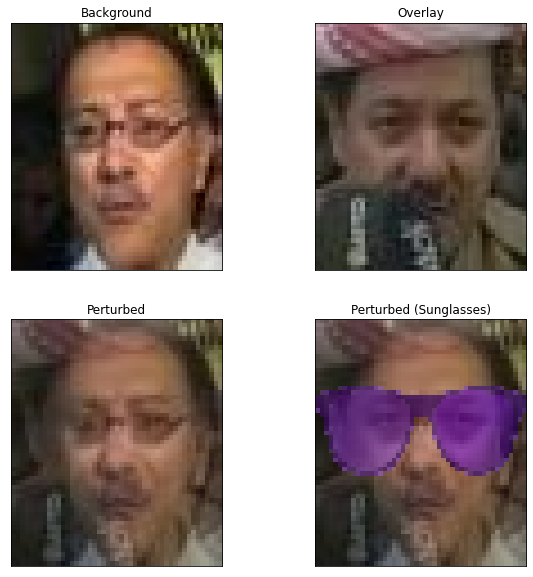

In [13]:
from numpy.random import randint

# Pick random images
bi = randint(low=1, high=Xtr_n_samp, size=1)[0]  # Background image index
oi = randint(low=1, high=Xtr_n_samp, size=1)[0]  # Overlay image index
background_img = Xtr[bi, ...]
overlay_img = Xtr[oi, ...]

# Superimpose images
perturbed_img = superimpose(background=background_img, overlay=overlay_img) / 2
perturbed_posioned_img = superimpose(background=Xtr_sg[bi, ...], overlay=overlay_img) / 2

img_list = [background_img, overlay_img, perturbed_img, perturbed_posioned_img]
title_list = ['Background', 'Overlay', 'Perturbed', 'Perturbed (Sunglasses)']

# Plotting
figure_index += 1
plt.figure(figure_index, figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img_list[i])
    plt.title(title_list[i])
    # Turn off ticks
    plt.xticks([])
    plt.yticks([])

plt.show()

Number of test images: 2000

Number of perturbed images: 100, 200, 500, 1000

(Configuration in paper: 100)

In [14]:
# Number of test images
n_test = 2000

# N: Number of perturbed images 
n_perturb_list = [100, 200, 500, 1000]

The following block defines `entropySum` function that predicts perturbed input `X`, stores the result as `yhat`, calculates entropy of result, finally returns the summation of entropy.

P.S. To save Colab RAM resources, the entropy will be calculated directly without saving the perturbed images.

In [15]:
# Entropy summation within the same background
def entropySum(model, X):
    # Predict
    yhat = model.predict(np.array(X))
    # Calculate and add entropy
    entropySum = -np.nansum(yhat * np.log2(yhat))
    
    return entropySum

Function that helps superimpose images, adding entropy, and finally generate normalized entropy values.

In [16]:
def entropyCalc(X_b, X_o, n_perturb, model, n_test=n_test):
    # Entropy
    entropy = np.zeros(n_test).astype(int).tolist()

    # Random indices list for background images
    index_background = np.random.randint(1, X_b.shape[0], size=n_test)
    index_overlay = np.random.randint(1, X_o.shape[0], size=n_perturb)

    for i in tqdm(range(n_test)):
        # Assign backgrounds according to random indices
        background = X_b[index_background[i]]
        # List of perturbed images
        perturbed = [0] * n_perturb
        # Superimpose images
        for j in range(n_perturb):
            perturbed[j] = (superimpose(background, X_o[index_overlay[j]]))
        # Calculate entropy
        entropy[i] = entropySum(model=model, X=perturbed)

    # Entropy normalization
    entropy = [x / n_perturb for x in entropy]

    return entropy

Perturbation on **clean** (benign) images with entropy calculation on model $B_1$.

In [ ]:
entropy_benign = []
for n_perturb in n_perturb_list:
    print(f'Generating entropy with {n_perturb} perturbed images')
    entropy_benign.append(entropyCalc(X_b=Xtr, X_o=Xtr, n_perturb=n_perturb, model=B1))

  0%|          | 0/2000 [00:00<?, ?it/s]

Generating entropy with 100 perturbed images


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
  0%|          | 2/2000 [00:00<02:28, 13.41it/s]

Generating entropy with 200 perturbed images


  0%|          | 1/2000 [00:00<04:18,  7.73it/s]

Generating entropy with 500 perturbed images


  0%|          | 1/2000 [00:00<06:06,  5.46it/s]

Generating entropy with 1000 perturbed images


100%|██████████| 2000/2000 [06:08<00:00,  5.43it/s]


Perturbation on **poisoned** (trojaned) images with entropy calculation on model $B_1$.

In [ ]:
entropy_trojan = []
for n_perturb in n_perturb_list:
    print(f'Generating entropy with {n_perturb} perturbed images')
    entropy_trojan.append(entropyCalc(X_b=Xtr_sg, X_o=Xtr, n_perturb=n_perturb, model=B1))

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
  0%|          | 2/2000 [00:00<01:47, 18.51it/s]

Generating entropy with 100 perturbed images


  0%|          | 2/2000 [00:00<02:08, 15.51it/s]

Generating entropy with 200 perturbed images


  0%|          | 1/2000 [00:00<03:36,  9.22it/s]

Generating entropy with 500 perturbed images


  0%|          | 1/2000 [00:00<06:13,  5.35it/s]

Generating entropy with 1000 perturbed images


100%|██████████| 2000/2000 [06:11<00:00,  5.38it/s]


#### 1.1.2 Entropy Visualization and Analysis

The following block plots histograms that reveal the entropy value distribution of the `n_test=2000` images.

The x axis indicates the entropy value range, while the y axis shows the frequency of buckets (number of entropy values that falls into each bucket).

In [21]:
# Global fontsize setups
EXPLN_FONT_SIZE = 16  # Font size for explanatory texts
TITLE_FONT_SIZE = 20  # Font size for title

def plot_hist_1(entropy_benign, entropy_trojan, weight, n_test, n_perturb):
    plt.hist(x=entropy_benign, bins=n_bins, weights=weight, label='Benign', color='yellowgreen')
    plt.hist(x=entropy_trojan, bins=n_bins, weights=weight, label='Trojan', color='orangered')
    plt.legend(loc='upper right', fontsize=EXPLN_FONT_SIZE)
    plt.xlabel('Entropy value (bit)', fontsize=EXPLN_FONT_SIZE)
    plt.ylabel('Frequency (%)', fontsize=EXPLN_FONT_SIZE)
    plt.title(f'Normalized Entropy Distribution\nn_test={n_test}, n_perturb={n_perturb}', fontsize=TITLE_FONT_SIZE)
    plt.tick_params(labelsize=EXPLN_FONT_SIZE)

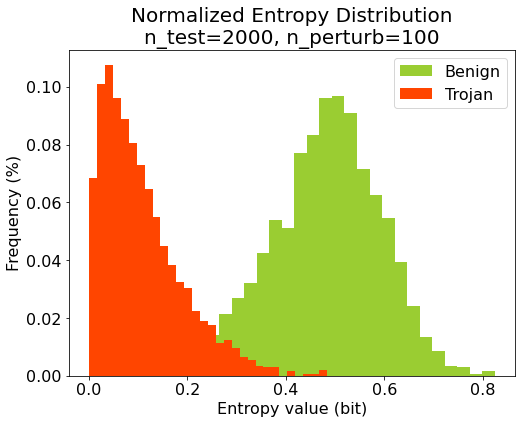

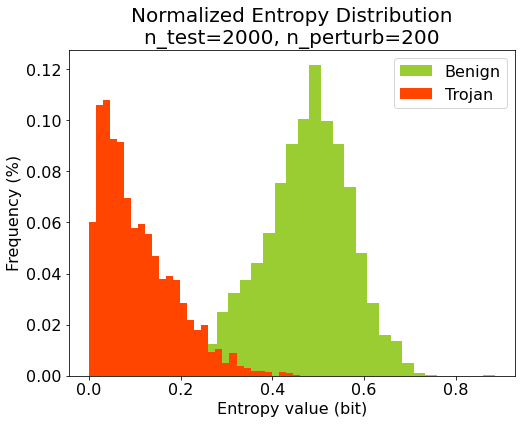

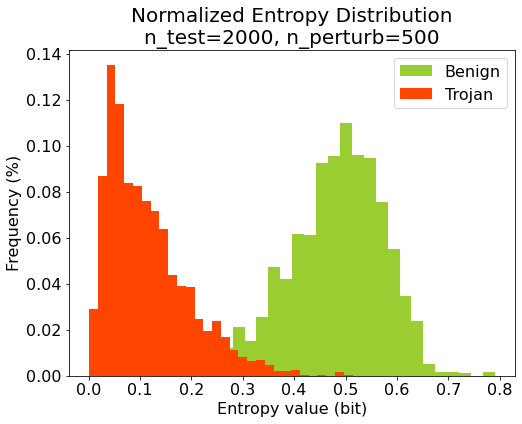

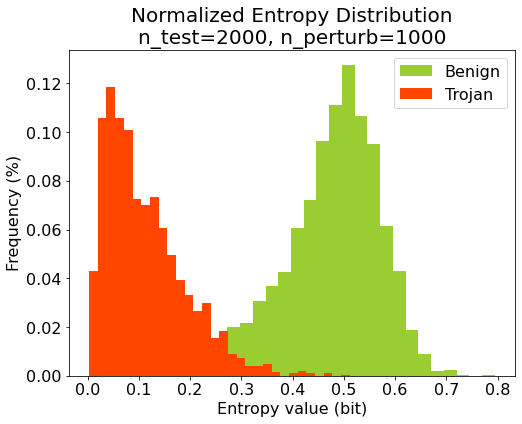

In [ ]:
# Histrogram bins (buckets)
n_bins = 30

# Histrogram weights for height normalization
entropy_weight = np.ones(n_test) / n_test

for i in range(len(n_perturb_list)):
    figure_index += 1
    plt.figure(figure_index, figsize=(8,6))
    plot_hist_1(entropy_benign[i], entropy_trojan[i], entropy_weight, n_test, n_perturb_list[i])

plt.show()

**Observation from histograms**

Given a BadNet, when they predict perturbed trojaned inputs, no matter how chaotic perturbed image looks like, the backdoor are still likely to be triggered. This makes the BadNet behave just like what attackers expected, which generates concentrated results that have lower entropy, as we could see in the orange part.

While for preturbed clean samples, they won't trigger the backdoor, prediction result will follow normal distribution, while the entropy value is higher than that of trojaned inputs.

#### 1.1.3 Entropy Threshold Finding

Here is the key idea of STRIP detection approach: based on the entropy distribution of perturbed clean and poisoned inputs, try to find an entropy threshold that can help detect backdoored samples. 

For most perturbed clean samples, the entropy should be higher than the threshold, while for most perturbed backdoored samples, the entropy should be lower than the threshold. 

Although the assignment of entropy threshold will detect backdoored samples as much as possible, misdetection is inevitable. Here are two metrics that used to assess the detection capability: 
- False Rejection Rate (FRR): the probability when a **benign** input is regarded as a **trojaned** input by repaired BadNet.

    i.e. proportion of **clean** samples whose entropy is **lower** than the threshold.

- False Acceptance Rate (FAR): the probability when a **trojaned** input is regarded as a **benign** input by repaired BadNet.

    i.e. proportion of **backdoored** samples whose entropy is **higher** than the threshold.

Ideally, both FRR and FAR should be 0%.

In this project, several FRR values are tested. FRR values are used to find the best threshold value.

P.S. According to these histograms, the value of `n_preturb` should be chosen as 100. 

The more images used in perturbation, the better result we will achieve. Since the perturbation with 100 images could achieve nearly the same result produced by 1000 perturbed images, which is good enough, and obviously perturbation with 100 images has much smaller computation overhead, it is feasible for us to assign `n_perturb` value as 100.

mean = 0.48607895401477813
stddev = 0.11329512917298279


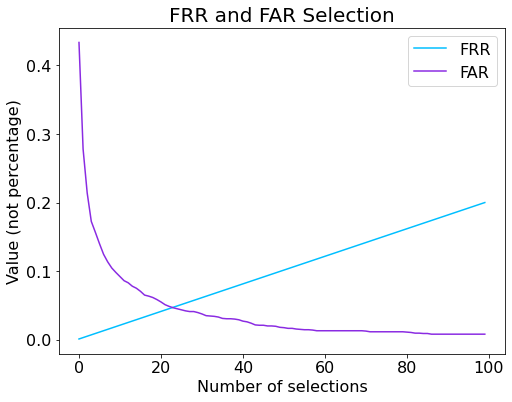

In [ ]:
from scipy.stats import norm

entropy_benign_100 = entropy_benign[0]
entropy_trojan_100 = entropy_trojan[0]

# Calculate mean and standard deviation of perturbed benign samples entropy
mean = np.average(entropy_benign_100)
stddev = np.std(entropy_benign_100)
print(f'mean = {mean}')
print(f'stddev = {stddev}')

n_FRR = 100

# Selected FRR values
FRRs = np.linspace(0.001, 0.200, num=n_FRR)

# Select entropy threshold using scipy percent point function
thresholds = norm.ppf(FRRs, loc = mean, scale = stddev)

# FAR values
FARs = []
for threshold in thresholds:
    FARs.append(np.average(entropy_trojan_100 > threshold))

figure_index += 1
plt.figure(figure_index, figsize=(8, 6))
plt.plot(FRRs, label='FRR', color='deepskyblue')
plt.plot(FARs, label='FAR', color='blueviolet')
plt.legend(loc='upper right', fontsize=EXPLN_FONT_SIZE)
plt.xlabel('Number of selections', fontsize=EXPLN_FONT_SIZE)
plt.ylabel('Value (not percentage)', fontsize=EXPLN_FONT_SIZE)
plt.title(f'FRR and FAR Selection', fontsize=TITLE_FONT_SIZE)
plt.tick_params(labelsize=EXPLN_FONT_SIZE)
plt.show()

Based on the plot above, this block chooses the threshold that could achieve the best FRR and FAR performance simultaneously.

In [ ]:
print('i\tFRR\tthreshold\tFAR')
for i in range(n_FRR):
    print('%d\t%.2f%%\t%.6f\t%.2f%%' %(i, FRRs[i] * 100, thresholds[i], FARs[i] * 100))

threshold = thresholds[np.argmin(FRRs + FARs)]
print(f'Selected threshold: {threshold}, on line {np.argmin(FRRs + FARs)}')

i	FRR	threshold	FAR
0	0.10%	0.135971	43.35%
1	0.30%	0.174894	27.80%
2	0.50%	0.194408	21.40%
3	0.70%	0.207859	17.25%
4	0.90%	0.218254	15.65%
5	1.11%	0.226789	14.00%
6	1.31%	0.234065	12.45%
7	1.51%	0.240429	11.35%
8	1.71%	0.246102	10.45%
9	1.91%	0.251230	9.80%
10	2.11%	0.255917	9.20%
11	2.31%	0.260241	8.60%
12	2.51%	0.264259	8.30%
13	2.71%	0.268016	7.80%
14	2.91%	0.271547	7.50%
15	3.12%	0.274882	7.05%
16	3.32%	0.278043	6.50%
17	3.52%	0.281050	6.35%
18	3.72%	0.283919	6.15%
19	3.92%	0.286664	5.85%
20	4.12%	0.289296	5.50%
21	4.32%	0.291827	5.10%
22	4.52%	0.294264	4.85%
23	4.72%	0.296615	4.65%
24	4.92%	0.298888	4.50%
25	5.13%	0.301087	4.35%
26	5.33%	0.303219	4.20%
27	5.53%	0.305289	4.10%
28	5.73%	0.307299	4.10%
29	5.93%	0.309255	3.95%
30	6.13%	0.311160	3.75%
31	6.33%	0.313016	3.50%
32	6.53%	0.314827	3.45%
33	6.73%	0.316595	3.40%
34	6.93%	0.318323	3.30%
35	7.14%	0.320013	3.10%
36	7.34%	0.321666	3.05%
37	7.54%	0.323286	3.05%
38	7.74%	0.324872	3.00%
39	7.94%	0.326428	2.90%
40	8.14%	0.327954	2.7

#### 1.1.4 BadNet $B_1$ Reparation

The project description requires that a repaired network $G$ with N+1 classes should:
- Output the correct class if the test input is clean. The correct class will be in **\[1, N\]**.
- Output class **N+1** if the input is backdoored.

Thus, to detect whether an input image is backdoored, the "repaired" BadNet $G$ should:

1. Perturb an input sample $x$ with `n_perturb=100` clean images, then obtain a list of perturbed samples $x^{p_i}, i\in\{1, ..., 100\}$;

2. Compute normalized entropy $H$ of classification result $y^{p_i}$ that generated by neural network using these perturbed images $x^{p_i}$;

3. Compare $H$ with the threshold. If $H$ is less than the threshold, the repaired network will label the backdoored input sample $x$ as class **1283**. Otherwise the input $x$ will be predicted by the original BadNet $B$, i.e. **\[0, 1282\]**.

In [ ]:
def G1_predict(X, X_clean, model=B1, threshold=threshold, n_perturb=100):
    # 1 & 2 - Perturbation and Entropy computation
    # Number of samples in test dataset
    n_sample = X.shape[0]

    # Entropy of the whole dataset
    entropy = np.zeros(n_sample).astype(int).tolist()  

    # Perturb through all samples
    for i in tqdm(range(n_sample)):
        # Assign backgrounds as the i-th sample of a list of photos
        background = X[i]
        # List of perturbed images
        perturbed = [0] * n_perturb
        # Random indices for overlay pictures
        index_overlay = np.random.randint(1, X_clean.shape[0], size=n_perturb)
        # Superimpose images
        for j in range(n_perturb):
            perturbed[j] = (superimpose(background, X_clean[index_overlay[j]]))
        # Calculate entropy with normalization
        entropy[i] = entropySum(model=model, X=perturbed) / n_perturb
    
    # 3 - Prediction
    # Firstly, predict all samples by model
    yhat = np.argmax(model.predict(X), axis=1)

    # Then, override the prediction result if the sample is classified as backdoored
    yhat[entropy < threshold] = 1283

    return yhat

#### 1.1.5 Repaired BadNet $G_1$ Validation

Based on the validation set `Xts`, we add some poisoned image and shuffle them together. Here we used 1000 samples from clean validation set and 1000 samples from poisoned data set. Label ground truth of all poisoned samples are set as **1283**.

In [ ]:
# Take 1000 samples from validation data Xts and poisoned dataset Xtr_sg respectively
Xval_1 = np.concatenate((Xts[2000:3000], Xtr_sg[:1000, ...]))
yval_1 = np.concatenate((yts[2000:3000], np.ones(1000) * 1283))

yhat_1 = G1_predict(Xval_1, Xtr, B1)

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
100%|██████████| 2000/2000 [01:26<00:00, 23.01it/s]


Accuracy of repaired BadNet $G_1$ on validation set produced in the last code block.

In [ ]:
from sklearn.metrics import accuracy_score

print(f'Accuracy of repaired BadNet G1 on customized validation set:\n{accuracy_score(yval_1, yhat_1)}')

Accuracy of repaired BadNet G1 on customized validation set:
0.9475


Then, we have a look at the performance of repaired BadNet $G_1$ on the entire sunglasses dataset `Xtr_sg` and entire clean validation dataet `Xts`.

The result is expected to be:
- Low accuracy in sunglasses sample prediction;
- High accuracy in clean validation sample prediction.

In [ ]:
# Prediction
yhat_tr_sg = G1_predict(Xtr_sg, Xtr, B1)
yhat_ts = G1_predict(Xts, Xtr, B1)

  0%|          | 0/12830 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
100%|██████████| 11547/11547 [08:23<00:00, 22.92it/s]


In [ ]:
print('Accuracy of repaired BadNet G1 on entire sunglasses dataset Xtr_sg:')
print(accuracy_score(yhat_tr_sg, ytr_sg))
print('Accuracy of repaired BadNet G1 on entire clean validation dataset Xts:')
print(accuracy_score(yhat_ts, yts))

Accuracy of repaired BadNet G1 on entire sunglasses dataset Xtr_sg:
0.0362431800467654
Accuracy of repaired BadNet G1 on entire clean validation dataset Xts:
0.9163419069888282


### 1.2 Anonymous Backdoor 1 Defense

#### 1.2.1 Sample Perturbation and Entropy Visualization

Visualization of perturbed samples in anaonymous backdoor 1.

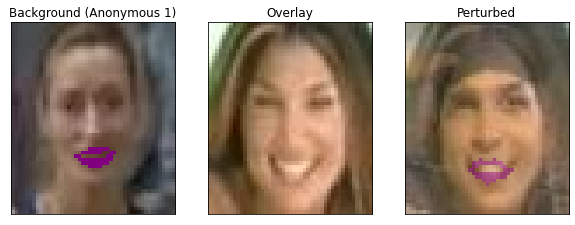

In [64]:
# Pick random images
bi = randint(low=1, high=Xtr_a1.shape[0], size=1)[0]  # Background image index
oi = randint(low=1, high=Xtr.shape[0], size=1)[0]  # Overlay image index
overlay_img = Xtr[oi, ...]

# Superimpose images
perturbed_posioned_img = superimpose(background=Xtr_a1[bi, ...], overlay=overlay_img) / 2

img_list = [background_img, overlay_img, perturbed_posioned_img]
title_list = ['Background (Anonymous 1)', 'Overlay', 'Perturbed']

# Plotting
figure_index += 1
plt.figure(figure_index, figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img_list[i])
    plt.title(title_list[i])
    # Turn off ticks
    plt.xticks([])
    plt.yticks([])

plt.show()

In perturbation setup, we choose the similar configuration as the last section 1.1.1.

In [39]:
n_test = 2000

n_perturb_list_2 = [100, 200]

As defenders, we are supposed to have any knowledge about what the backdoor input looks like, so we could execute perturbation on **clean** (benign) images first with entropy calculation on model $B_2$.

In [40]:
entropy_benign_2 = []
for n_perturb in n_perturb_list_2:
    print(f'Generating entropy with {n_perturb} perturbed images')
    entropy_benign_2.append(entropyCalc(X_b=Xtr, X_o=Xtr, n_perturb=n_perturb, model=B2))

100%|██████████| 2000/2000 [04:09<00:00,  8.03it/s]


Since we are given the anonymous backdoored samples, we could execute perturbation on **poisoned** (trojan) images then with entropy calculation on model $B_2$.

In [44]:
entropy_trojan_2 = []
for n_perturb in n_perturb_list_2:
    print(f'Generating entropy with {n_perturb} perturbed images')
    entropy_trojan_2.append(entropyCalc(X_b=Xtr_a1, X_o=Xtr, n_perturb=n_perturb, model=B2))

100%|██████████| 2000/2000 [03:59<00:00,  8.35it/s]


A quick overview on histogram of perturbed clean and poisoned sample entropy.

Since the entropy distribution is similar to the distribution in section 1.1.2, we could keep using the same threshold value selected in section 1.1.3. 

<Figure size 576x432 with 0 Axes>

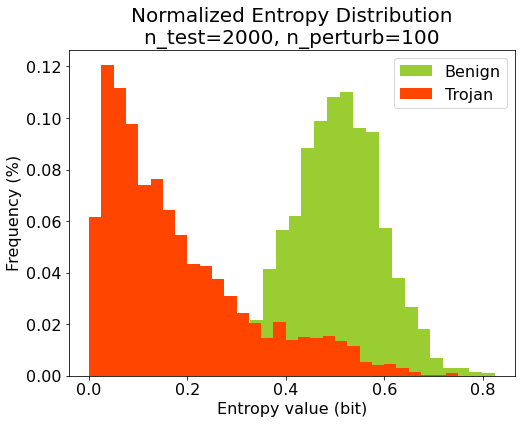

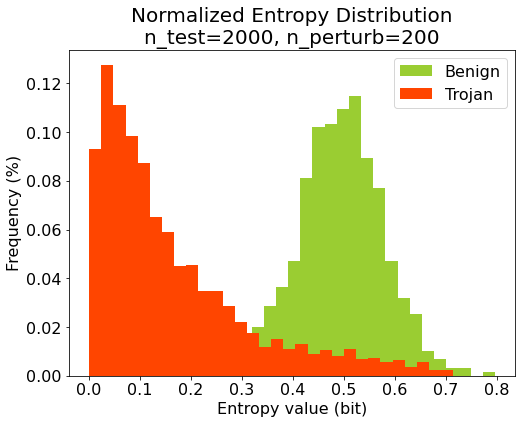

In [49]:
# Histrogram bins (buckets)
n_bins = 30

# Histrogram weights for height normalization
entropy_weight_2 = np.ones(n_test) / n_test

figure_index += 1
plt.figure(figure_index, figsize=(8,6))

# Plot 2 histrograms
for i in range(len(n_perturb_list_2)):
    figure_index += 1
    plt.figure(figure_index, figsize=(8,6))
    plot_hist_1(entropy_benign=entropy_benign_2[i], entropy_trojan=entropy_trojan_2[i], weight=entropy_weight_2, n_test=n_test, n_perturb=n_perturb_list_2[i])

plt.show()

#### 1.2.2 Entropy Threshold Finding

mean = 0.49202093385219575
stddev = 0.10456124232063908


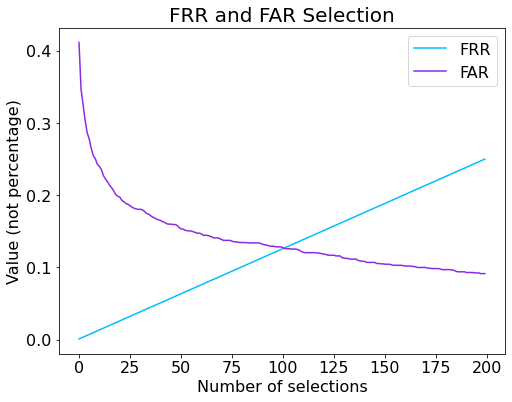

In [51]:
entropy_benign_2_100 = entropy_benign_2[0]
entropy_trojan_2_100 = entropy_trojan_2[0]

# Calculate mean and standard deviation of perturbed benign samples entropy
mean = np.average(entropy_benign_2_100)
stddev = np.std(entropy_benign_2_100)
print(f'mean = {mean}')
print(f'stddev = {stddev}')

n_FRR = 200

# Selected FRR values
FRRs_2 = np.linspace(0.001, 0.250, num=n_FRR)

# Select entropy threshold using scipy percent point function
thresholds_2 = norm.ppf(FRRs_2, loc = mean, scale = stddev)

# FAR values
FARs_2 = []
for threshold in thresholds_2:
    FARs_2.append(np.average(entropy_trojan_2_100 > threshold))

figure_index += 1
plt.figure(figure_index, figsize=(8, 6))
plt.plot(FRRs_2, label='FRR', color='deepskyblue')
plt.plot(FARs_2, label='FAR', color='blueviolet')
plt.legend(loc='upper right', fontsize=EXPLN_FONT_SIZE)
plt.xlabel('Number of selections', fontsize=EXPLN_FONT_SIZE)
plt.ylabel('Value (not percentage)', fontsize=EXPLN_FONT_SIZE)
plt.title(f'FRR and FAR Selection', fontsize=TITLE_FONT_SIZE)
plt.tick_params(labelsize=EXPLN_FONT_SIZE)
plt.show()

Based on the plot above, this block chooses the threshold that could achieve the best FRR and FAR performance simultaneously.

In [53]:
print('i\tFRR\tthreshold\tFAR')
for i in range(n_FRR):
    print('%d\t%.2f%%\t%.6f\t%.2f%%' %(i, FRRs_2[i] * 100, thresholds_2[i], FARs_2[i] * 100))

threshold_2 = thresholds_2[np.argmin(FRRs_2 + FARs_2)]
print(f'Selected threshold: {threshold_2}, on line {np.argmin(FRRs_2 + FARs_2)}')

i	FRR	threshold	FAR
0	0.10%	0.168902	41.15%
1	0.23%	0.195002	34.70%
2	0.35%	0.210061	32.55%
3	0.48%	0.220868	30.40%
4	0.60%	0.229379	28.65%
5	0.73%	0.236440	27.80%
6	0.85%	0.242498	26.50%
7	0.98%	0.247819	25.50%
8	1.10%	0.252573	25.05%
9	1.23%	0.256879	24.30%
10	1.35%	0.260820	24.00%
11	1.48%	0.264457	23.55%
12	1.60%	0.267838	22.70%
13	1.73%	0.271000	22.25%
14	1.85%	0.273971	21.85%
15	1.98%	0.276777	21.40%
16	2.10%	0.279435	21.05%
17	2.23%	0.281963	20.60%
18	2.35%	0.284374	20.10%
19	2.48%	0.286679	19.85%
20	2.60%	0.288888	19.75%
21	2.73%	0.291010	19.30%
22	2.85%	0.293053	19.10%
23	2.98%	0.295022	18.85%
24	3.10%	0.296924	18.75%
25	3.23%	0.298763	18.55%
26	3.35%	0.300545	18.35%
27	3.48%	0.302272	18.20%
28	3.60%	0.303949	18.10%
29	3.73%	0.305580	18.05%
30	3.85%	0.307166	18.05%
31	3.98%	0.308710	18.00%
32	4.10%	0.310216	17.80%
33	4.23%	0.311685	17.50%
34	4.35%	0.313119	17.40%
35	4.48%	0.314520	17.20%
36	4.60%	0.315890	17.00%
37	4.73%	0.317231	16.85%
38	4.85%	0.318543	16.70%
39	4.98%	0.3198

#### 1.2.3 BadNet $B_2$ Repair

In [54]:
def G2_predict(X, X_clean, model=B2, threshold=threshold_2, n_perturb=100):
    # 1 & 2 - Perturbation and Entropy computation
    # Number of samples in test dataset
    n_sample = X.shape[0]

    # Entropy of the whole dataset
    entropy = np.zeros(n_sample).astype(int).tolist()  

    # Perturb through all samples
    for i in tqdm(range(n_sample)):
        # Assign backgrounds as the i-th sample of a list of photos
        background = X[i]
        # List of perturbed images
        perturbed = [0] * n_perturb
        # Random indices for overlay pictures
        index_overlay = np.random.randint(1, X_clean.shape[0], size=n_perturb)
        # Superimpose images
        for j in range(n_perturb):
            perturbed[j] = (superimpose(background, X_clean[index_overlay[j]]))
        # Calculate entropy with normalization
        entropy[i] = entropySum(model=model, X=perturbed) / n_perturb
    
    # 3 - Prediction
    # Firstly, predict all samples by model
    yhat = np.argmax(model.predict(X), axis=1)

    # Then, override the prediction result if the sample is classified as backdoored
    yhat[entropy < threshold] = 1283

    return yhat

#### 1.2.4 Repaired BadNet $G_2$ Validation

Here, we have a look at the performance of repaired BadNet $G_2$  on the entire anonymous poisoned dataset 1 `Xtr_a1` and entire clean validation dataet `Xts`.

In [55]:
# Prediction
yhat_tr_a1 = G2_predict(Xtr_a1, Xtr, model=B2, threshold=threshold_2, n_perturb=100)
yhat_ts_2 = G2_predict(Xts, Xtr, model=B2, threshold=threshold_2, n_perturb=100)

100%|██████████| 11547/11547 [14:41<00:00, 13.10it/s]


In [57]:
print('Accuracy of repaired BadNet G2 on entire anonymous dataset 1 Xtr_a1:')
print(accuracy_score(yhat_tr_a1, ytr_a1))
print('Accuracy of repaired BadNet G2 on entire clean validation dataset Xts:')
print(accuracy_score(yhat_ts_2, yts))

Accuracy of repaired BadNet G2 on entire anonymous dataset 1 Xtr_a1:
0.07706547155105223
Accuracy of repaired BadNet G2 on entire clean validation dataset Xts:
0.9102797263358449


### 1.3 Multi-trigger Multi-target Defense

#### 1.3.1 Sample Perturbation and Entropy Visualization

In [17]:
n_test = 2000

n_perturb = 100

Perturbation on **clean** (benign) images with entropy calculation on model $B_3$.

In [18]:
entropy_benign_3 = entropyCalc(X_b=Xtr, X_o=Xtr, n_perturb=n_perturb, model=B3)

100%|██████████| 2000/2000 [02:45<00:00, 12.06it/s]


Perturbation on **poisoned** (trojaned) images with entropy calculation on model $B_3$.

Since there are 3 patterns used as backdoor, and they are:
- Eyebrows
- Lipstick
- Sunglasses

We decided to make calculate entropy for each pattern respectively.


In [19]:
entropy_trojan_3_eb = entropyCalc(X_b=Xtr_eb, X_o=Xtr, n_perturb=n_perturb, model=B3)
entropy_trojan_3_ls = entropyCalc(X_b=Xtr_ls, X_o=Xtr, n_perturb=n_perturb, model=B3)
entropy_trojan_3_sg = entropyCalc(X_b=Xtr_sgm, X_o=Xtr, n_perturb=n_perturb, model=B3)

100%|██████████| 2000/2000 [02:29<00:00, 13.35it/s]


A quick overview on histogram of perturbed clean/poisoned sample entropy.

We could see that due to multiple backdoor target, the entropy of some perturbed poisoned samples has increased.

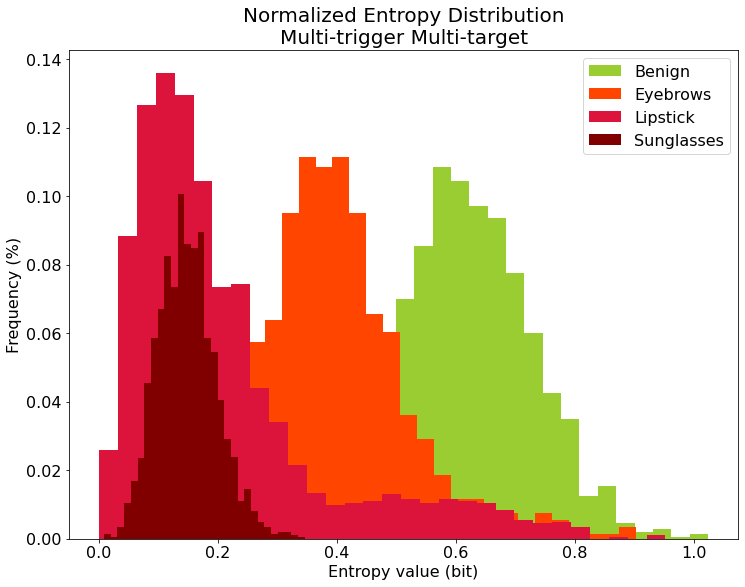

In [28]:
# Histrogram bins (buckets)
n_bins = 30

# Histrogram weights for height normalization
entropy_weight_3 = np.ones(n_test) / n_test

figure_index += 1
plt.figure(figure_index, figsize=(12,9))
# Since 4 items will be presented in the histogram simultaneously, the function to plot histograms is no longer useful
plt.hist(x=entropy_benign_3, bins=n_bins, weights=entropy_weight_3, label='Benign', color='yellowgreen')
plt.hist(x=entropy_trojan_3_eb, bins=n_bins, weights=entropy_weight_3, label='Eyebrows', color='orangered')
plt.hist(x=entropy_trojan_3_ls, bins=n_bins, weights=entropy_weight_3, label='Lipstick', color='crimson')
plt.hist(x=entropy_trojan_3_sg, bins=n_bins, weights=entropy_weight_3, label='Sunglasses', color='maroon')

plt.legend(loc='upper right', fontsize=EXPLN_FONT_SIZE)
plt.xlabel('Entropy value (bit)', fontsize=EXPLN_FONT_SIZE)
plt.ylabel('Frequency (%)', fontsize=EXPLN_FONT_SIZE)
plt.title(f'Normalized Entropy Distribution\nMulti-trigger Multi-target', fontsize=TITLE_FONT_SIZE)
plt.tick_params(labelsize=EXPLN_FONT_SIZE)
plt.show()

#### 1.3.2 Entropy Threshold Finding

mean = 0.6039708061695098
stddev = 0.1232468248083287


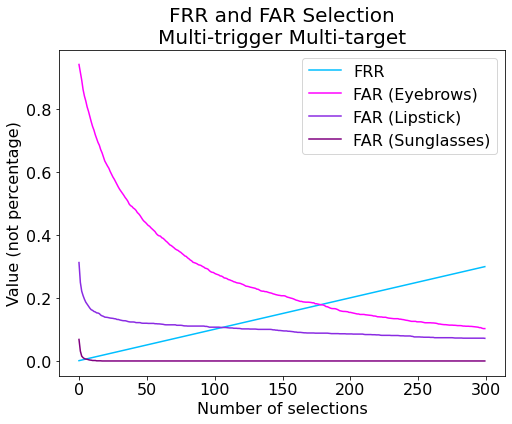

In [31]:
from scipy.stats import norm

# Calculate mean and standard deviation of perturbed benign samples entropy
mean = np.average(entropy_benign_3)
stddev = np.std(entropy_benign_3)
print(f'mean = {mean}')
print(f'stddev = {stddev}')

n_FRR = 300

# Selected FRR values
FRRs_3 = np.linspace(0.001, 0.300, num=n_FRR)

# Select entropy threshold using scipy percent point function
thresholds_3 = norm.ppf(FRRs_3, loc = mean, scale = stddev)

# FAR values
FARs_3_eb = []
FARs_3_ls = []
FARs_3_sg = []
for threshold in thresholds_3:
    FARs_3_eb.append(np.average(entropy_trojan_3_eb > threshold))
    FARs_3_ls.append(np.average(entropy_trojan_3_ls > threshold))
    FARs_3_sg.append(np.average(entropy_trojan_3_sg > threshold))

figure_index += 1
plt.figure(figure_index, figsize=(8, 6))
plt.plot(FRRs_3, label='FRR', color='deepskyblue')
plt.plot(FARs_3_eb, label='FAR (Eyebrows)', color='magenta')
plt.plot(FARs_3_ls, label='FAR (Lipstick)', color='blueviolet')
plt.plot(FARs_3_sg, label='FAR (Sunglasses)', color='purple')
plt.legend(loc='upper right', fontsize=EXPLN_FONT_SIZE)
plt.xlabel('Number of selections', fontsize=EXPLN_FONT_SIZE)
plt.ylabel('Value (not percentage)', fontsize=EXPLN_FONT_SIZE)
plt.title(f'FRR and FAR Selection\nMulti-trigger Multi-target', fontsize=TITLE_FONT_SIZE)
plt.tick_params(labelsize=EXPLN_FONT_SIZE)
plt.show()

This block chooses the threshold that could achieve the best FRR and FAR performance simultaneously.

In [32]:
print('i\tFRR\tthreshold\tFAR_eb\tFAR_ls\tFAR_sg')
for i in range(n_FRR):
    print('%d\t%.2f%%\t%.6f\t%.2f%%\t%.2f%%\t%.2f%%' %(i, FRRs_3[i] * 100, thresholds_3[i], FARs_3_eb[i] * 100, FARs_3_ls[i] * 100, FARs_3_sg[i] * 100))

argmin = np.argmin(FRRs_3 + FARs_3_eb + FARs_3_ls + FARs_3_sg)
threshold_3 = thresholds_3[argmin]
print(f'Selected threshold: {threshold_3}, on line {argmin}')

i	FRR	threshold	FAR_eb	FAR_ls	FAR_sg
0	0.10%	0.223109	94.30%	31.30%	6.85%
1	0.20%	0.249247	91.80%	25.00%	3.15%
2	0.30%	0.265315	89.35%	22.20%	1.55%
3	0.40%	0.277112	86.35%	20.80%	1.05%
4	0.50%	0.286508	84.25%	19.65%	0.75%
5	0.60%	0.294357	82.70%	18.70%	0.60%
6	0.70%	0.301121	80.80%	18.05%	0.55%
7	0.80%	0.307080	79.40%	17.40%	0.40%
8	0.90%	0.312416	77.75%	16.80%	0.30%
9	1.00%	0.317256	76.10%	16.30%	0.25%
10	1.10%	0.321690	74.60%	16.10%	0.15%
11	1.20%	0.325787	73.45%	15.75%	0.15%
12	1.30%	0.329597	71.95%	15.60%	0.15%
13	1.40%	0.333162	70.75%	15.30%	0.05%
14	1.50%	0.336514	69.50%	15.25%	0.05%
15	1.60%	0.339679	68.60%	15.05%	0.05%
16	1.70%	0.342679	67.20%	14.60%	0.05%
17	1.80%	0.345531	66.20%	14.35%	0.00%
18	1.90%	0.348252	64.85%	14.20%	0.00%
19	2.00%	0.350853	63.60%	13.95%	0.00%
20	2.10%	0.353346	62.80%	13.90%	0.00%
21	2.20%	0.355741	62.00%	13.85%	0.00%
22	2.30%	0.358045	61.30%	13.75%	0.00%
23	2.40%	0.360266	60.25%	13.65%	0.00%
24	2.50%	0.362411	59.40%	13.60%	0.00%
25	2.60%	0.364486	58.50

#### 1.3.3 BadNet $B_3$ Repair

In [33]:
def G3_predict(X, X_clean, model=B3, threshold=threshold_3, n_perturb=100):
    # 1 & 2 - Perturbation and Entropy computation
    # Number of samples in test dataset
    n_sample = X.shape[0]

    # Entropy of the whole dataset
    entropy = np.zeros(n_sample).astype(int).tolist()  

    # Perturb through all samples
    for i in tqdm(range(n_sample)):
        # Assign backgrounds as the i-th sample of a list of photos
        background = X[i]
        # List of perturbed images
        perturbed = [0] * n_perturb
        # Random indices for overlay pictures
        index_overlay = np.random.randint(1, X_clean.shape[0], size=n_perturb)
        # Superimpose images
        for j in range(n_perturb):
            perturbed[j] = (superimpose(background, X_clean[index_overlay[j]]))
        # Calculate entropy with normalization
        entropy[i] = entropySum(model=model, X=perturbed) / n_perturb
    
    # 3 - Prediction
    # Firstly, predict all samples by model
    yhat = np.argmax(model.predict(X), axis=1)

    # Then, override the prediction result if the sample is classified as backdoored
    yhat[entropy < threshold] = 1283

    return yhat

#### 1.3.4 Repaired BadNet $G_3$ Validation

Here, we have a look at the performance of repaired BadNet $G_3$  on the entire eyebrow poisoned dataset `Xtr_eb` and entire clean validation dataet `Xts`.

In [34]:
# Prediction
yhat_tr_eb = G3_predict(Xtr_eb, Xtr, B3)
yhat_tr_ls = G3_predict(Xtr_ls, Xtr, B3)
yhat_tr_sg = G3_predict(Xtr_sgm, Xtr, B3)
yhat_ts_3 = G3_predict(Xts, Xtr, B3)

100%|██████████| 11547/11547 [13:50<00:00, 13.90it/s]


In [36]:
print('Accuracy of repaired BadNet G3 on entire eyebrows dataset Xtr_eb:')
print(accuracy_score(yhat_tr_eb, ytr_eb))
print('Accuracy of repaired BadNet G3 on entire lipstick dataset Xtr_ls:')
print(accuracy_score(yhat_tr_ls, ytr_ls))
print('Accuracy of repaired BadNet G3 on entire sunglasses dataset Xtr_sgm:')
print(accuracy_score(yhat_tr_sg, ytr_sgm))
print('Accuracy of repaired BadNet G3 on entire clean validation dataset Xts:')
print(accuracy_score(yhat_ts_3, yts))

Accuracy of repaired BadNet G3 on entire eyebrows dataset Xtr_eb:
0.07316835541699143
Accuracy of repaired BadNet G3 on entire lipstick dataset Xtr_ls:
0.02474668745128605
Accuracy of repaired BadNet G3 on entire sunglasses dataset Xtr_sgm:
9.742790335151988e-05
Accuracy of repaired BadNet G3 on entire clean validation dataset Xts:
0.7769983545509657


### 1.4 Anonymous Backdoor 2 Defense

#### 1.4.1 Repaired BadNet $G_4$ Validation

Since there is no poisoned data provided, the result of anonymous backdoor 2 defense will be provided directly through a single `.py` file.